In [3]:
pip install streamlit

     |████████████████████████████████| 8.0 MB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 170 kB 84.5 MB/s eta 0:00:01
     |████████████████████████████████| 23.6 MB 82.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 561 kB/s  eta 0:00:01
     |████████████████████████████████| 727 kB 74.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 78.9 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 63 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 70 kB 5.7 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

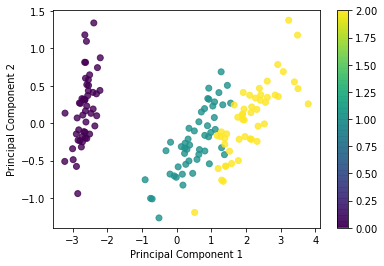

In [6]:
import streamlit as st
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

st.title('Streamlit Example')

st.write("""
# Explore different classifier and datasets
Which one is the best?
""")

dataset_name = st.sidebar.selectbox(
    'Select Dataset',
    ('Iris', 'Breast Cancer', 'Wine')
)

st.write(f"## {dataset_name} Dataset")

classifier_name = st.sidebar.selectbox(
    'Select classifier',
    ('KNN', 'SVM', 'Random Forest')
)

def get_dataset(name):
    data = None
    if name == 'Iris':
        data = datasets.load_iris()
    elif name == 'Wine':
        data = datasets.load_wine()
    else:
        data = datasets.load_breast_cancer()
    X = data.data
    y = data.target
    return X, y

X, y = get_dataset(dataset_name)
st.write('Shape of dataset:', X.shape)
st.write('number of classes:', len(np.unique(y)))

def add_parameter_ui(clf_name):
    params = dict()
    if clf_name == 'SVM':
        C = st.sidebar.slider('C', 0.01, 10.0)
        params['C'] = C
    elif clf_name == 'KNN':
        K = st.sidebar.slider('K', 1, 15)
        params['K'] = K
    else:
        max_depth = st.sidebar.slider('max_depth', 2, 15)
        params['max_depth'] = max_depth
        n_estimators = st.sidebar.slider('n_estimators', 1, 100)
        params['n_estimators'] = n_estimators
    return params

params = add_parameter_ui(classifier_name)

def get_classifier(clf_name, params):
    clf = None
    if clf_name == 'SVM':
        clf = SVC(C=params['C'])
    elif clf_name == 'KNN':
        clf = KNeighborsClassifier(n_neighbors=params['K'])
    else:
        clf = clf = RandomForestClassifier(n_estimators=params['n_estimators'],
            max_depth=params['max_depth'], random_state=1234)
    return clf

clf = get_classifier(classifier_name, params)
#### CLASSIFICATION ####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

st.write(f'Classifier = {classifier_name}')
st.write(f'Accuracy =', acc)

#### PLOT DATASET ####
# Project the data onto the 2 primary principal components
pca = PCA(2)
X_projected = pca.fit_transform(X)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

fig = plt.figure()
plt.scatter(x1, x2,
        c=y, alpha=0.8,
        cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

#plt.show()
st.pyplot(fig)
